In [1]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

sns.set()

## Import preprocessed data

In [2]:
df = pd.read_csv(join('..', 'data', 'tugas_preprocessed.csv'))

In [3]:
df.head()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x1_Widow,x2_M,x3_1.0,x4_Kind of OK,x4_Meh...,x4_OK nice!,x4_Take my money!!,PC0,PC1,PC2
0,0.743162,1.191605,0.457819,-0.617023,-0.243065,1.216847,0.495837,-0.499274,-1.257560,0.522055,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.896356,1.937697,-1.120781
1,1.559488,1.100011,-1.535723,0.166160,-0.790228,0.740464,-0.374374,-0.631907,-1.798649,-0.237578,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.981092,1.421498,-0.785625
2,-1.548542,-0.823463,0.557496,-0.834573,1.672006,-0.371096,-0.809480,2.286023,0.906799,-0.904191,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-2.813108,-0.381440,0.780867
3,0.845528,0.550447,-1.402820,0.383710,0.440889,-0.768082,-0.084304,-0.234007,-0.391816,0.785568,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.247013,0.514177,1.302203
4,0.782435,1.008417,-0.871209,0.340200,-0.243065,-0.053508,-0.374374,-0.366640,-0.445925,1.237135,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.781920,0.704805,0.443376


In [4]:
df.columns

Index(['income', 'frq', 'rcn', 'clothes', 'kitchen', 'small_appliances',
       'toys', 'house_keeping', 'per_net_purchase', 'spent_online',
       'x0_2nd Cycle', 'x0_Graduation', 'x0_Master', 'x0_PhD', 'x1_Married',
       'x1_Single', 'x1_Together', 'x1_Widow', 'x2_M', 'x3_1.0',
       'x4_Kind of OK', 'x4_Meh...', 'x4_OK nice!', 'x4_Take my money!!',
       'PC0', 'PC1', 'PC2'],
      dtype='object')

In [5]:
# Splitting feature names into groups
non_metric_features = df.columns[df.columns.str.startswith('x')]
pc_features = df.columns[df.columns.str.startswith('PC')]
metric_features = df.columns[~df.columns.str.startswith('x') & ~df.columns.str.startswith('PC')]

## K-Means Clustering
What is K-Means clustering? How does it work?

### How is it computed?
![](../figures/kmeans.png)

### Characteristics:
- *Number of clusters* need to be set apriori
- One of the *fastest* clustering algorithms
- The results *depend on the initialization* (stochastic)
- Prone to *local optima*
- Favors *convex* (round shape) and *isotropic* (same shape) clusters

### How to apply K-Means clustering?

In [6]:
kmclust = KMeans(init='random')
# the fit method
kmclust.fit(df[metric_features])

KMeans(init='random')

In [7]:
# the predict method
kmclust.predict(df[metric_features])

array([5, 5, 3, ..., 4, 0, 7])

In [8]:
# the transform method
pd.DataFrame(kmclust.transform(df[metric_features]))

,0,1,2,3,4,5,6,7
0,2.092633,3.880060,3.661481,5.638727,3.988144,1.186245,4.655048,3.268643
1,3.195392,4.438895,4.640615,6.730050,3.632172,1.895850,5.877192,3.632328
2,4.354407,4.275742,3.329640,2.417032,4.557854,5.614938,3.288123,5.696416
3,2.461762,3.413053,3.936046,5.431739,2.384068,2.687694,4.520295,2.172142
4,2.580551,3.348307,3.871965,5.832980,2.657412,1.960068,5.010762,1.468901
...,...,...,...,...,...,...,...,...
8812,2.983031,3.688086,3.781514,5.698971,2.561069,3.032678,4.563235,2.330850
8813,3.818424,3.938272,4.522398,6.296537,2.872869,3.604561,5.563783,1.904675
8814,3.904123,3.059905,2.263562,4.387060,1.989372,4.507192,3.506977,4.183733
8815,2.421128,3.237453,2.983308,4.520185,3.521784,2.562765,4.064120,3.077446


### How can we improve the initialization step?

In [9]:
# Better initialization method and provide more n_init
kmclust = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df[metric_features])

KMeans(n_init=15, random_state=1)

In [10]:
kmclust.predict(df[metric_features])

array([4, 4, 7, ..., 6, 2, 0])

*init='k-means++'* initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization. *n_init=K* allows to initialize KMeans K times and pick the best clustering in terms of Inertia. This can been shown in the link below.

**Empirical evaluation of the impact of k-means initialization:**

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html#sphx-glr-auto-examples-cluster-plot-kmeans-stability-low-dim-dense-py

### Defining the number of clusters:

In [11]:
range_clusters = range(1,11)

In [12]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust =  KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    # fit the clusterer
    kmclust.fit(df[metric_features])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

**Inertia (within-cluster sum-of-squares distance) Formula:**
$$\sum_{j=0}^{C}\sum_{i=0}^{n_j}(||x_i - \mu_j||^2)$$
, where:

$C$: Set of identified clusters.

$n_j$: Set of observations belonging to cluster $j$.

$x_i$: Observation $i$.

$\mu_j$: Centroid of cluster $j$.

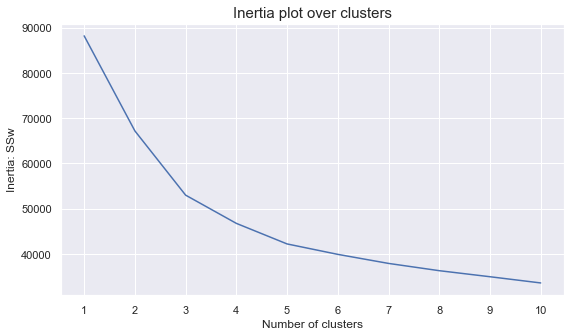

In [26]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.xticks(range(10), range_clusters)
plt.title("Inertia plot over clusters", size=15)
plt.show()

**Silhouette Coefficient formula for a single sample:**
$$s = \frac{b - a}{max(a, b)}$$
, where:
- $a$: The mean distance between a sample and all other points in the same cluster.
- $b$: The mean distance between a sample and all other points in the next nearest cluster

For n_clusters = 2, the average silhouette_score is : 0.2216925624241448
For n_clusters = 3, the average silhouette_score is : 0.23707766584584286
For n_clusters = 4, the average silhouette_score is : 0.21036821905415626
For n_clusters = 5, the average silhouette_score is : 0.19514283937028068
For n_clusters = 6, the average silhouette_score is : 0.18736793579734382
For n_clusters = 7, the average silhouette_score is : 0.16983500681630878
For n_clusters = 8, the average silhouette_score is : 0.16670886503251847
For n_clusters = 9, the average silhouette_score is : 0.1549596056099329
For n_clusters = 10, the average silhouette_score is : 0.15066928575504182


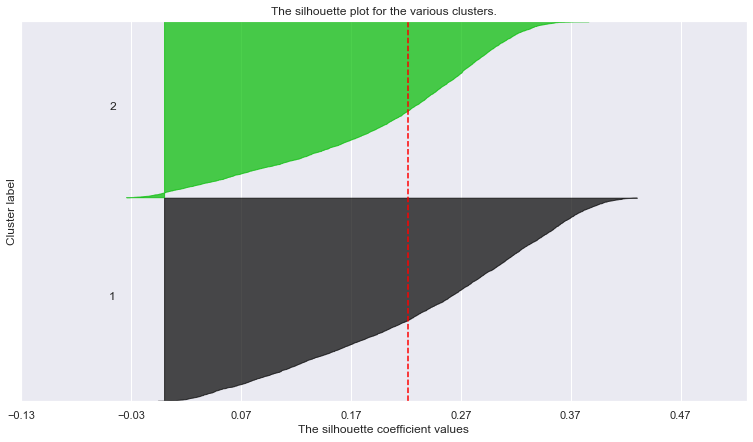

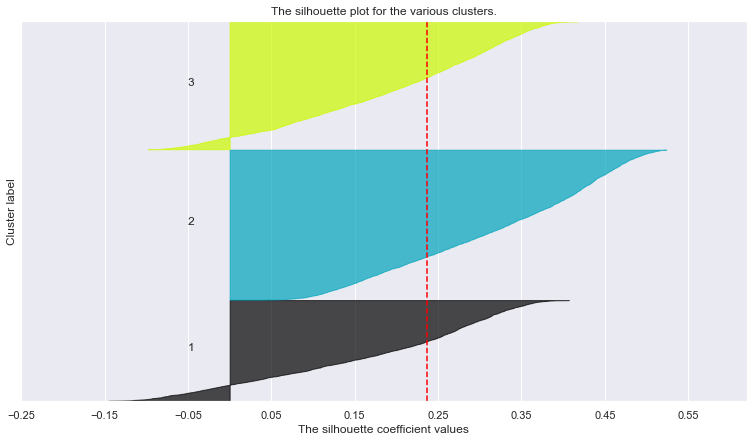

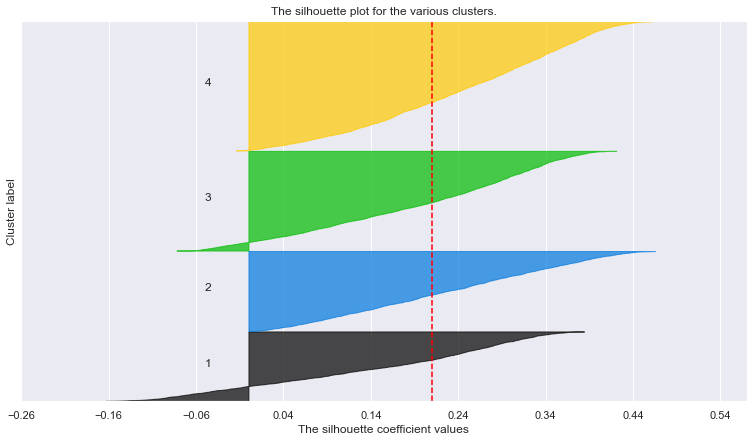

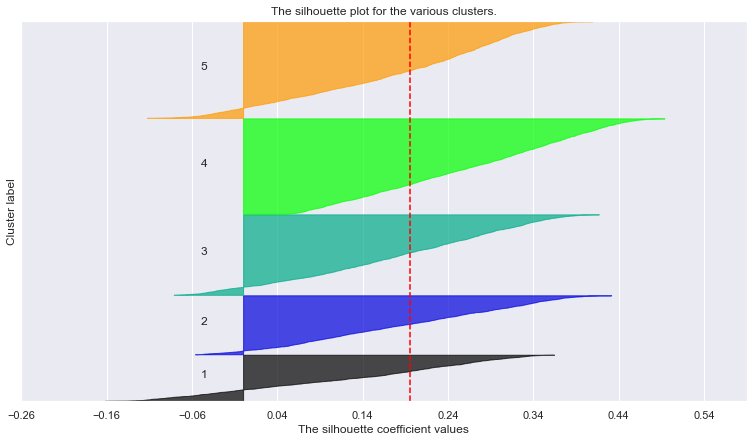

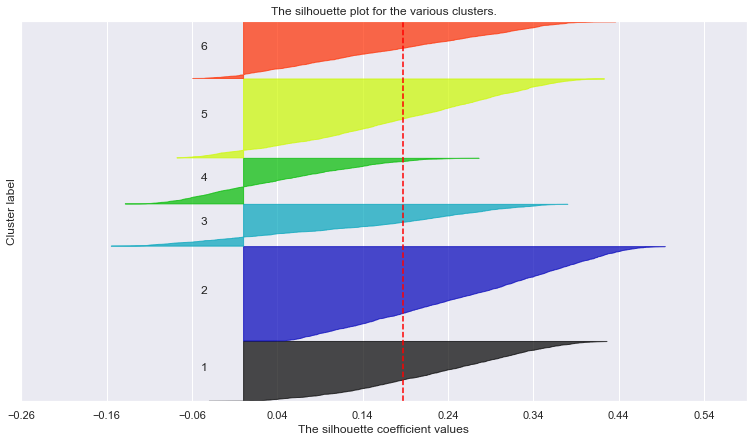

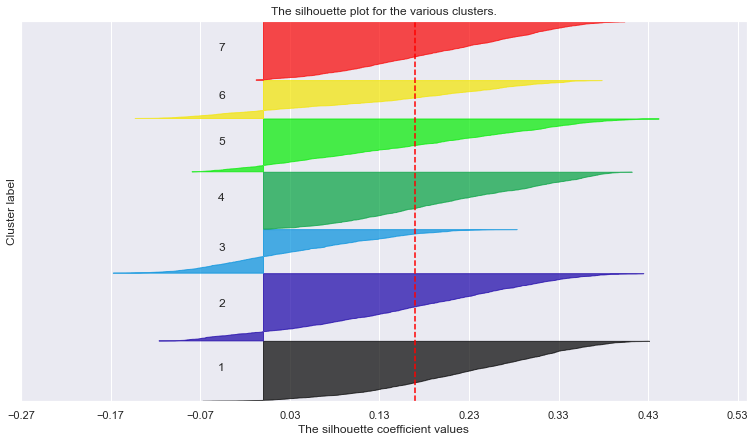

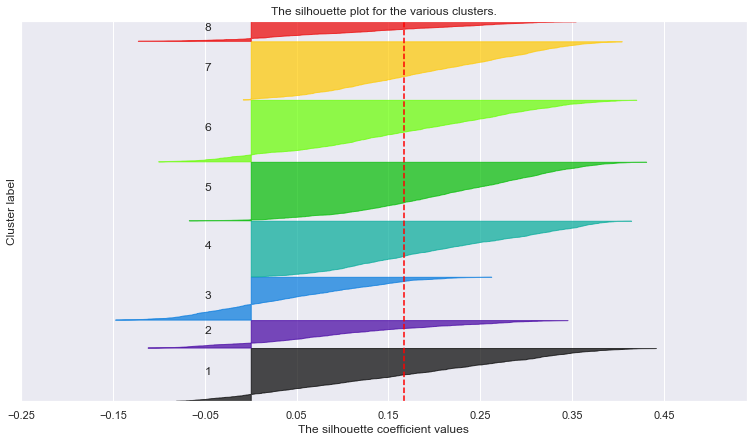

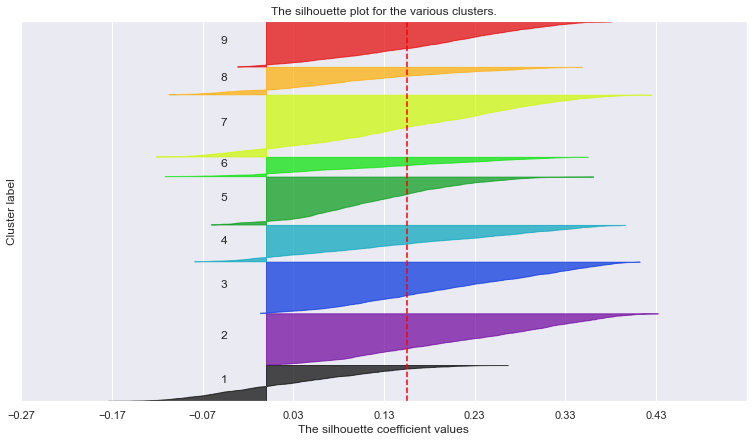

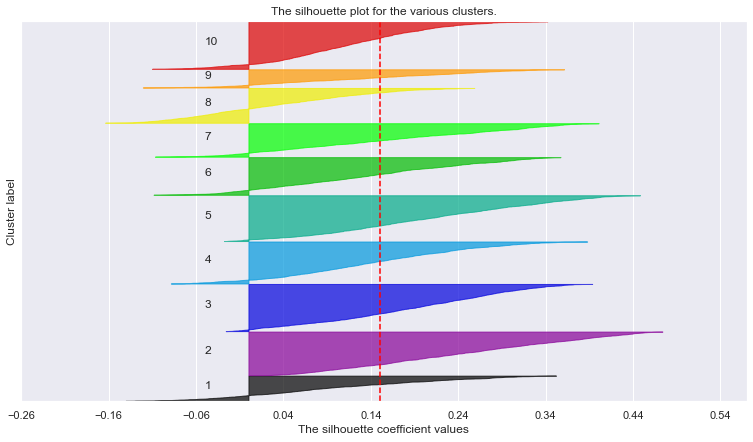

In [38]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df[metric_features], cluster_labels, random_state=10)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values =  silhouette_samples(df[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

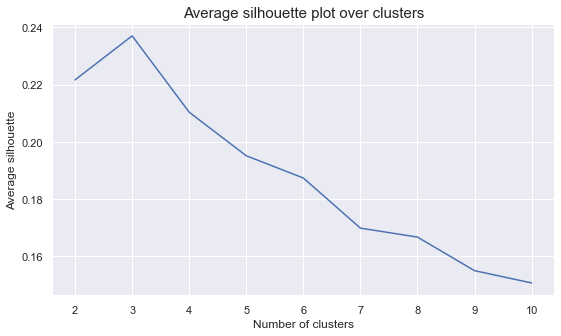

In [39]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.xticks(range(9), range(2,11))
plt.show()

### Final KMeans clustering solution

In [40]:
# final cluster solution
number_clusters =  3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=20, random_state=0)
km_labels = kmclust.fit_predict(df[metric_features])
km_labels

array([1, 1, 0, ..., 2, 1, 1])

In [42]:
# Characterizing the final clusters
df_concat = pd.concat((df, pd.Series(km_labels + 1, name='labels')), axis=1)
df_concat.groupby('labels').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x1_Widow,x2_M,x3_1.0,x4_Kind of OK,x4_Meh...,x4_OK nice!,x4_Take my money!!,PC0,PC1,PC2
labels,,,,,,,,,,,,,,,,,,,,,
1,-1.046284,-0.846926,0.105853,-1.035016,0.811621,0.472642,0.816766,0.833492,0.698238,-0.769259,...,0.008936,0.652766,0.842979,0.328511,0.334894,0.324681,0.001277,-2.478538,0.109271,0.043317
2,1.051969,1.059128,-0.071631,-0.227489,0.037535,0.370902,0.041180,0.002260,-1.029420,0.685935,...,0.110329,0.640174,0.360832,0.080818,0.087525,0.463447,0.368209,1.179816,1.594804,-0.118743
3,-0.194607,-0.335163,-0.010087,0.892585,-0.579409,-0.636080,-0.585997,-0.563973,0.410006,-0.068206,...,0.024390,0.640172,0.936872,0.298422,0.284935,0.350072,0.062267,0.661794,-1.438305,0.072396


### How can we combine the 2 algorithms?

## Exercise:
**Apply Hierarchical Clustering and K-means on the Principal Components.**

Choose the appropriate parameters and number of clusters for each algorithm and interpret each cluster based on the Principal Components interpretation: